#Tarefa 4 - Regras de associação

## Nesta tarefa, você deve carregar um dataset e minerar regras de associação usando o algoritmo Apriori, visto em aula. As métricas de avaliação das regras mineradas devem observar os cuidados vistos em aula.

Dica: Para toda a tarefa, além da biblioteca pandas e matplotlib, você pode querer explorar funções da biblioteca mlxtend.frequent_patterns (em particular os pacotes apriori e association_rules).
Além disso, você vai precisar usar uma função de pré-processamento que transforma a base de dados de transações em uma base de dados de registros adequada para a extração das regras. Busque por TransactionEncoder

###Importe os pacotes e carregue os arquivos com os dados

Os datasets a serem utilizados encontram-se nos arquivos `compras_cafeteria.csv` e `product_data.csv`, disponível no EAD.

**product_data**: dataset que relaciona um número identificador de um produto com o seu nome, sabor, preço e categoria.

**compras_cafeteria**: Dataset de registros de compras de uma cafeteria. Possui as colunas `id` como identificador do cliente e `product` como o número do produto comprado.




In [36]:
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import numpy as np
import mlxtend

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [37]:
df = pd.read_csv('compras_cafeteria.csv',sep=',')
df.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,id,product_1
0,1,3
1,1,4
2,1,2
3,1,5
4,2,1


In [38]:
df2 = pd.read_csv('product_data.csv',sep=',')
df2.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,product_number,flavor,product,price,category
0,0,Chocolate,Cake,8.95,Food
1,1,Lemon,Cake,8.95,Food
2,2,Casino,Cake,15.95,Food
3,3,Opera,Cake,15.95,Food
4,4,Strawberry,Cake,11.95,Food


### Transforme as bases de dados

---


primeiro agrupe os itens comprados para cada cliente
depois transforme os dados agrupados em uma lista de transações
e então crie a base de dados (DataFrame), codificada para minerar as regras de associação (use o TransactionEncoder)
após criar a base de dados, troque o nome das features pelos nomes armazenados no dataset product_data.csv (use a função rename)
"Some" as colunas flavor e product para conseguir o nome inteiro do produto.

Exemplo:

flavor = "Chocolate"

product = "Cake"

precisamos do nome do produto como "Chocolate Cake"

In [39]:
dados_agrupados = df.groupby('id')['product_1'].apply(list).reset_index()
print(dados_agrupados)



       id                                  product_1
0       1                [3, 4, 2, 5, 7, 15, 49, 44]
1       2                              [1, 2, 1, 19]
2       3                              [1, 1, 1, 19]
3       4   [1, 1, 5, 5, 1, 1, 18, 35, 3, 15, 44, 4]
4       5            [4, 4, 2, 5, 5, 4, 9, 23, 2, 7]
..    ...                                        ...
995   996  [3, 2, 3, 5, 3, 4, 46, 33, 31, 10, 2, 22]
996   997                 [3, 5, 4, 2, 22, 2, 32, 6]
997   998           [1, 3, 5, 4, 5, 4, 9, 0, 33, 30]
998   999                       [2, 5, 2, 18, 35, 3]
999  1000                      [4, 3, 3, 15, 47, 34]

[1000 rows x 2 columns]


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [40]:
lista_transacoes = dados_agrupados['product_1'].tolist()
print(lista_transacoes)

[[3, 4, 2, 5, 7, 15, 49, 44], [1, 2, 1, 19], [1, 1, 1, 19], [1, 1, 5, 5, 1, 1, 18, 35, 3, 15, 44, 4], [4, 4, 2, 5, 5, 4, 9, 23, 2, 7], [2, 4, 3, 14, 44, 21], [4, 3, 2, 1, 1, 1, 12, 31, 36, 48, 44, 4], [5, 1, 3, 28, 27, 15], [3, 1, 28, 2], [5, 2, 1, 18, 35, 3], [4, 5, 1, 2, 5, 23, 24, 40, 41, 43], [1, 4, 3, 43, 48, 20], [4, 49], [2, 3, 2, 1, 19, 26], [5, 3, 4, 22, 5, 39], [2, 2, 1, 16, 32, 45], [2, 1, 2, 5, 3, 3, 4, 9, 6, 16, 22, 10], [2, 5, 3, 1, 19, 23], [2, 4, 2, 5, 7, 11, 37, 45], [4, 4, 4, 3, 18, 35, 3, 32], [4, 3, 1, 5, 8, 47, 1, 19], [2, 1, 3, 44, 34, 39], [3, 5, 13, 19], [4, 4, 5, 4, 9, 38], [3, 3, 1, 48, 7, 22], [5, 4, 2, 14, 11, 7], [5, 2, 4, 2, 4, 23, 24, 40, 41, 43], [2, 4, 14, 9], [4, 1, 5, 0, 2, 42], [1, 5, 35, 13], [3, 23], [4, 4, 4, 1, 25, 21, 8, 38], [1, 4, 4, 46], [3, 5, 3, 2, 2, 23, 24, 40, 41, 43], [1, 4, 5, 3, 17, 47, 29, 4], [1, 1, 4, 12, 31, 36], [4, 5, 4, 4, 4, 14, 44, 26, 22, 37], [5, 5, 1, 4, 4, 5, 16, 32, 45, 47, 30, 0], [2, 2, 4, 2, 4, 1, 5, 1, 19, 27, 11, 25

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [41]:
from mlxtend.preprocessing import TransactionEncoder
encoder = TransactionEncoder()
dados_encoded = encoder.fit_transform(lista_transacoes)
df_encoded = pd.DataFrame(dados_encoded, columns=encoder.columns_)
print(df_encoded)

        0      1      2      3      4      5      6      7      8      9   \
0    False  False   True   True   True   True  False   True  False  False   
1    False   True   True  False  False  False  False  False  False  False   
2    False   True  False  False  False  False  False  False  False  False   
3    False   True  False   True   True   True  False  False  False  False   
4    False  False   True  False   True   True  False   True  False   True   
..     ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
995  False  False   True   True   True   True  False  False  False  False   
996  False  False   True   True   True   True   True  False  False  False   
997   True   True  False   True   True   True  False  False  False   True   
998  False  False   True   True  False   True  False  False  False  False   
999  False  False  False   True   True  False  False  False  False  False   

     ...     40     41     42     43     44     45     46     47     48    

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [42]:
product_columns = [f'product_{num}' for num in df2['product_number']]
df_encoded.columns = product_columns

for coluna in df_encoded.columns:
    product_info = df2.loc[df2['product_number'] == int(coluna.split('_')[1])]
    df_encoded.rename(columns={coluna: f"{product_info['flavor'].values[0]} {product_info['product'].values[0]}"}, inplace=True)

print(df_encoded)



/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


     Chocolate Cake  Lemon Cake  Casino Cake  Opera Cake  Strawberry Cake  \
0             False       False         True        True             True   
1             False        True         True       False            False   
2             False        True        False       False            False   
3             False        True        False        True             True   
4             False       False         True       False             True   
..              ...         ...          ...         ...              ...   
995           False       False         True        True             True   
996           False       False         True        True             True   
997            True        True        False        True             True   
998           False       False         True        True            False   
999           False       False        False        True             True   

     Truffle Cake  Chocolate Eclair  Coffee Eclair  Vanilla Eclair  \
0    

### Minere as regras de associação
Obs: Para começar, você pode definir um suporte mínimo de 6% (se quiser, varie esse valor para visualizar os efeitos)

In [43]:
from mlxtend.frequent_patterns import apriori, association_rules
frequent_itemsets = apriori(df_encoded, min_support=0.06, use_colnames=True)

rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.5)

print("regras de associação:")
print(rules)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


regras de associação:
                                    antecedents        consequents  \
0                              (Chocolate Cake)      (Casino Cake)   
1                                 (Casino Cake)       (Lemon Cake)   
2                                  (Lemon Cake)      (Casino Cake)   
3                                  (Opera Cake)       (Lemon Cake)   
4                                  (Lemon Cake)       (Opera Cake)   
..                                          ...                ...   
72  (Strawberry Cake, Truffle Cake, Opera Cake)       (Lemon Cake)   
73       (Truffle Cake, Opera Cake, Lemon Cake)  (Strawberry Cake)   
74   (Strawberry Cake, Casino Cake, Opera Cake)     (Truffle Cake)   
75  (Strawberry Cake, Truffle Cake, Opera Cake)      (Casino Cake)   
76      (Casino Cake, Truffle Cake, Opera Cake)  (Strawberry Cake)   

    antecedent support  consequent support  support  confidence      lift  \
0                0.084               0.528    0.064    0.761

### Gere e visualize as regras de associação
Obs:
* Para começar, você pode definir uma confiança mínima de 50% (se quiser, varie esse valor para visualizar os efeitos)
* para visualizar as regras geradas, ordene-as descrescentemente com relação à confiança

In [44]:
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.5)

rules = rules.sort_values(by='confidence', ascending=False)

print("regras de associação:")
print(rules)

regras de associação:


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


                                   antecedents        consequents  \
9                                 (Lemon Tart)       (Lemon Cake)   
27                            (Apricot Danish)       (Opera Cake)   
30                             (Napoleon Cake)  (Strawberry Cake)   
35                          (Gongolais Cookie)     (Truffle Cake)   
24                               (Cherry Tart)       (Opera Cake)   
..                                         ...                ...   
17                              (Truffle Cake)      (Casino Cake)   
38                    (Opera Cake, Lemon Cake)      (Casino Cake)   
23                                (Opera Cake)     (Truffle Cake)   
74  (Strawberry Cake, Casino Cake, Opera Cake)     (Truffle Cake)   
22                              (Truffle Cake)       (Opera Cake)   

    antecedent support  consequent support  support  confidence      lift  \
9                0.076               0.581    0.062    0.815789  1.404113   
27               

### Usando linguagem natural (Português), descreva a regra gerada que tem a maior confiança:

A regra geral que gera maior confiança é que cerca de 81,579% das vezes que há a compra de Lemon Tart, há a compra em seguida do Lemon Cake. Logo, quem compra um Lemon Tart provavemente também irá adquirir o Lemon Cake.

### Qual o suporte e a confiança desta regra?

*   Suporte: aproximadamente 6,20%.
*   Confiança:cerca de 81,58%.




### Filtre as regras com confiança maior do que 55%

In [45]:
rules_filtered = rules[rules['confidence'] > 0.55]

rules_filtered = rules_filtered.sort_values(by='confidence', ascending=False)

print("Regras de Associação com confiança > 55%:")
print(rules_filtered)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Regras de Associação com confiança > 55%:
                                    antecedents        consequents  \
9                                  (Lemon Tart)       (Lemon Cake)   
27                             (Apricot Danish)       (Opera Cake)   
30                              (Napoleon Cake)  (Strawberry Cake)   
35                           (Gongolais Cookie)     (Truffle Cake)   
24                                (Cherry Tart)       (Opera Cake)   
0                              (Chocolate Cake)      (Casino Cake)   
19                           (Chocolate Coffee)      (Casino Cake)   
33                           (Chocolate Coffee)  (Strawberry Cake)   
11                            (Apple Croissant)       (Lemon Cake)   
31                                 (Berry Tart)  (Strawberry Cake)   
34                                 (Berry Tart)     (Truffle Cake)   
26                               (Tuile Cookie)       (Opera Cake)   
71      (Casino Cake, Truffle Cake, Lemon Cake) 

### Plote um gráfico para analisar as regras de associação em base na confiança, suporte e elevação (lift) das regras de associação
Dica: use um gráfico scatter usando duas das variáveis como os eixos x e y e adicione a restante como shading.

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


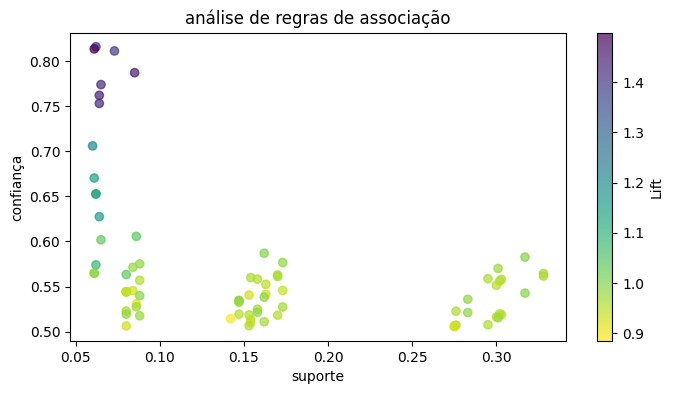

In [46]:
plt.figure(figsize=(8, 4))
plt.scatter(rules['support'], rules['confidence'], c=rules['lift'], cmap='viridis_r', alpha=0.7)
plt.xlabel('suporte')
plt.ylabel('confiança')
plt.colorbar(label='Lift')
plt.title('análise de regras de associação')
plt.show()

### Imagine o seguinte contexto: O dono da cafeteria deseja aumentar as vendas do produto "Lemon Cake" e, para isso, seu analista de vendas sugere criar uma promoção que inclua o produto "Lemon Cake" e outros produtos que são frequentemente consumidos junto com "Lemon Cake". Quais produtos você indicaria para serem incluidos na promoção?

Dica: Explore a relação entre antecedentes e consequentes de uma regra.  

In [47]:
lemon_cake_rules =rules[rules['antecedents'].apply(lambda x: 'Lemon Cake' in x)]

produtos_frquentes= lemon_cake_rules['consequents'].explode().value_counts().index.tolist()

print("produtos indicados pra serem incluídos:")
for produto in produtos_frquentes:
    print( produto)

produtos indicados pra serem incluídos:
Strawberry Cake
Opera Cake
Truffle Cake
Casino Cake


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
